Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOe-11l-seg summary (fused): 227 layers, 35,117,862 parameters, 2,254,374 gradients

image 1/1 /content/1000011922.jpg: 640x384 (no detections), 2073.4ms
Speed: 23.2ms preprocess, 2073.4ms inference, 12.2ms postprocess per image at shape (1, 3, 640, 384)


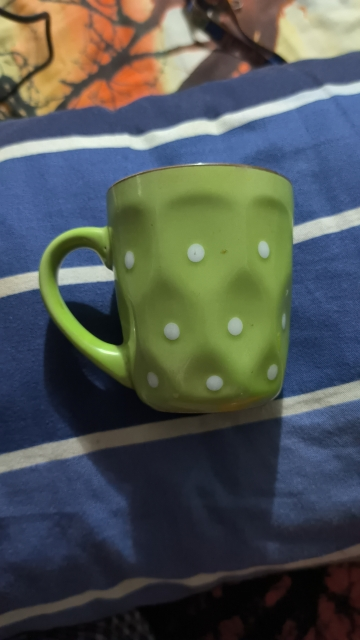

In [2]:
import numpy as np

from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe import YOLOEVPSegPredictor

# Initialize a YOLOE model
model = YOLOE("yoloe-11l-seg.pt")

# Define visual prompts using bounding boxes and their corresponding class IDs.
# Each box highlights an example of the object you want the model to detect.
visual_prompts = dict(
    bboxes=np.array(
        [
            [27, 42, 304, 295],
            [21, 164, 301, 423],
            # [347, 117, 507, 232],
            # Box enclosing glasses
        ],
    ),
    cls=np.array(
        [
             0,
            0,
            # ID to be assigned for person
             # ID to be assigned for glassses
        ]
    ),
)

# Run inference on an image, using the provided visual prompts as guidance
results = model.predict(
    "/content/1000011922.jpg",
    visual_prompts=visual_prompts,
    predictor=YOLOEVPSegPredictor,
)

# Show results
results[0].show()

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOe-11l-seg summary (fused): 227 layers, 35,117,862 parameters, 2,254,374 gradients

0: 640x384 1 object0, 2412.6ms
1: 640x384 1 object0, 2412.6ms
2: 640x384 1 object0, 1 object1, 1 object2, 2412.6ms
Speed: 2.3ms preprocess, 2412.6ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 384)


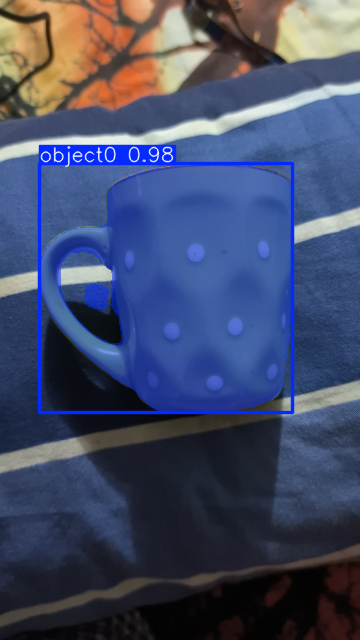

In [5]:
import numpy as np

from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe import YOLOEVPSegPredictor

# Initialize a YOLOE model
model = YOLOE("yoloe-11l-seg.pt")

# Define visual prompts using bounding boxes and their corresponding class IDs.
# Each box highlights an example of the object you want the model to detect.
visual_prompts = dict(
    bboxes=[
        np.array(
            [
                [21, 164, 301, 423],  # Box enclosing Glasses
                [41, 207, 336, 428],  # Box enclosing Metal
            ],
        ),
        np.array([[27, 42, 304, 295],[347, 117, 507, 232]]), # Box enclosing Glasses, metal
        np.array([[16, 156, 112, 475],[150, 197, 215, 435],[241, 286, 346, 368]]) # Box enclosing metal, plastic, bio
    ],
    cls=[
        np.array(
            [
                0,  # ID to be assigned for glasses
                1,  # ID to be assigned for metal
            ]
        ),
        np.array([0,1]), # ID to be assigned for glasses, metal
        np.array([1,2,3]) # ID to be assigned for metal, plastic, bio
    ],
)

# Run inference on multiple image, using the provided visual prompts as guidance
results = model.predict(
    ["/content/1000011922.jpg","/content/1000011923.jpg","/content/Image_3.jpg"],
    visual_prompts=visual_prompts,
    predictor=YOLOEVPSegPredictor,
)

# Show results
results[0].show()

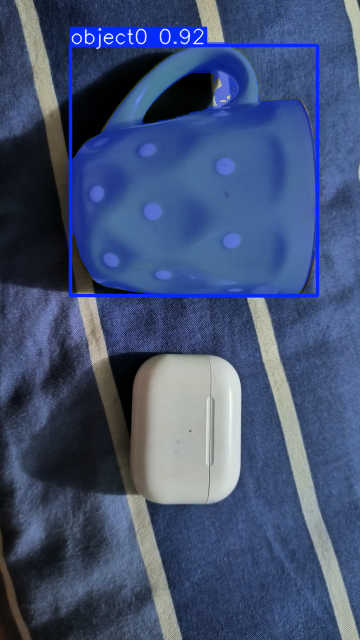

In [6]:
results[1].show()

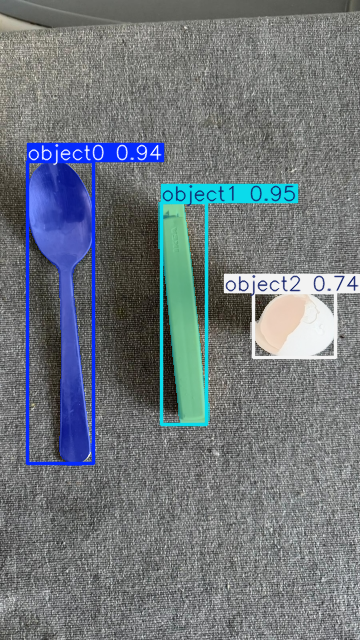

In [7]:
results[2].show()